Training R² Score: 0.95
Testing R² Score: 0.61
Mean Squared Error (MSE): 76.03


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


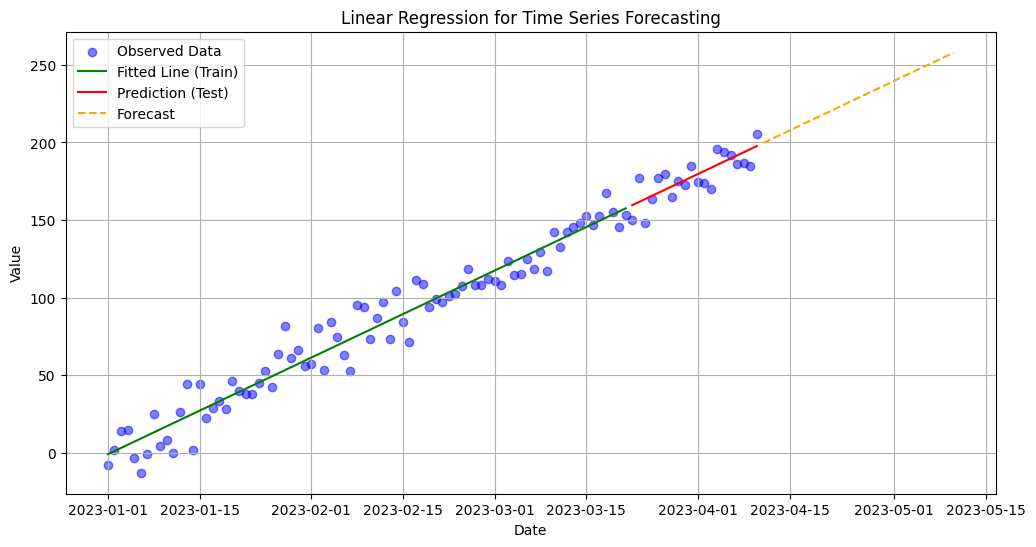

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Generate sample time series data (linear trend with noise)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = pd.DataFrame({
    'Date': dates,
    'Value': 2 * np.arange(100) + np.random.normal(0, 10, 100)  # Linear trend + noise
})
data.set_index('Date', inplace=True)

# Step 2: Feature engineering - use numerical time index
data['Time'] = np.arange(len(data))

# Step 3: Prepare data for regression
X = data[['Time']]
y = data['Value']

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 7: Evaluate the model
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Step 8: Forecast future values (next 30 days)
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_time = np.arange(len(data), len(data) + 30).reshape(-1, 1)
future_pred = model.predict(future_time)

# Step 9: Visualize everything
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['Value'], color='blue', label='Observed Data', alpha=0.5)
plt.plot(data.index[:len(X_train)], y_pred_train, color='green', label='Fitted Line (Train)')
plt.plot(data.index[len(X_train):], y_pred_test, color='red', label='Prediction (Test)')
plt.plot(future_dates, future_pred, color='orange', linestyle='--', label='Forecast')
plt.title('Linear Regression for Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Training R² Score: 0.96
Testing R² Score: -0.11
Mean Squared Error (MSE): 156.59


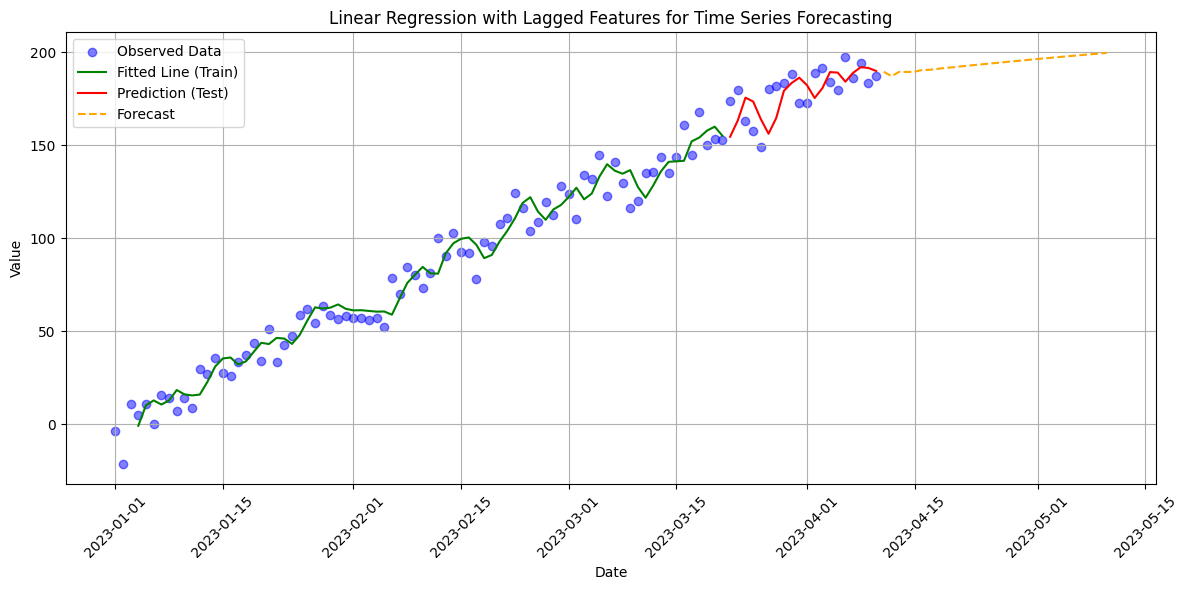

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

# Suppress all warnings for cleaner output
warnings.filterwarnings('ignore')

# Step 1: Generate sample time series data (linear trend with noise)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = pd.DataFrame({
    'Date': dates,
    'Value': 2 * np.arange(100) + np.random.normal(0, 10, 100)  # Linear trend + noise
})
data.set_index('Date', inplace=True)

# Step 2: Feature engineering - create lagged features
def create_lagged_features(series, lag=3):
    df = pd.DataFrame(series)
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = series.shift(i)
    return df.dropna()

lag = 3
lagged_data = create_lagged_features(data['Value'], lag)

# Step 3: Prepare data for regression
X = lagged_data.drop('Value', axis=1)  # Features: lag_1, lag_2, lag_3
y = lagged_data['Value']  # Target: current Value

# Step 4: Split into training and testing sets (no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 7: Evaluate the model
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Step 8: Forecast future values (next 30 days)
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions = []
last_values = data['Value'][-lag:].values.tolist()  # Last 3 known values

for _ in range(len(future_dates)):
    input_lags = np.array(last_values[-lag:]).reshape(1, -1)
    next_pred = model.predict(input_lags)[0]
    future_predictions.append(next_pred)
    last_values.append(next_pred)

# Step 9: Visualize everything
plt.figure(figsize=(12, 6))
# Observed data (full dataset)
plt.scatter(data.index, data['Value'], color='blue', label='Observed Data', alpha=0.5)
# Training predictions (aligned with lagged data index)
plt.plot(lagged_data.index[:len(X_train)], y_pred_train, color='green', label='Fitted Line (Train)')
# Test predictions
plt.plot(lagged_data.index[len(X_train):], y_pred_test, color='red', label='Prediction (Test)')
# Future forecast
plt.plot(future_dates, future_predictions, color='orange', linestyle='--', label='Forecast')
plt.title('Linear Regression with Lagged Features for Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for readability
plt.tight_layout()
plt.show()

Multi-Lag Model Training R² Score: 0.96
Multi-Lag Model Testing R² Score: -0.11
Multi-Lag Model Mean Squared Error (MSE): 156.59


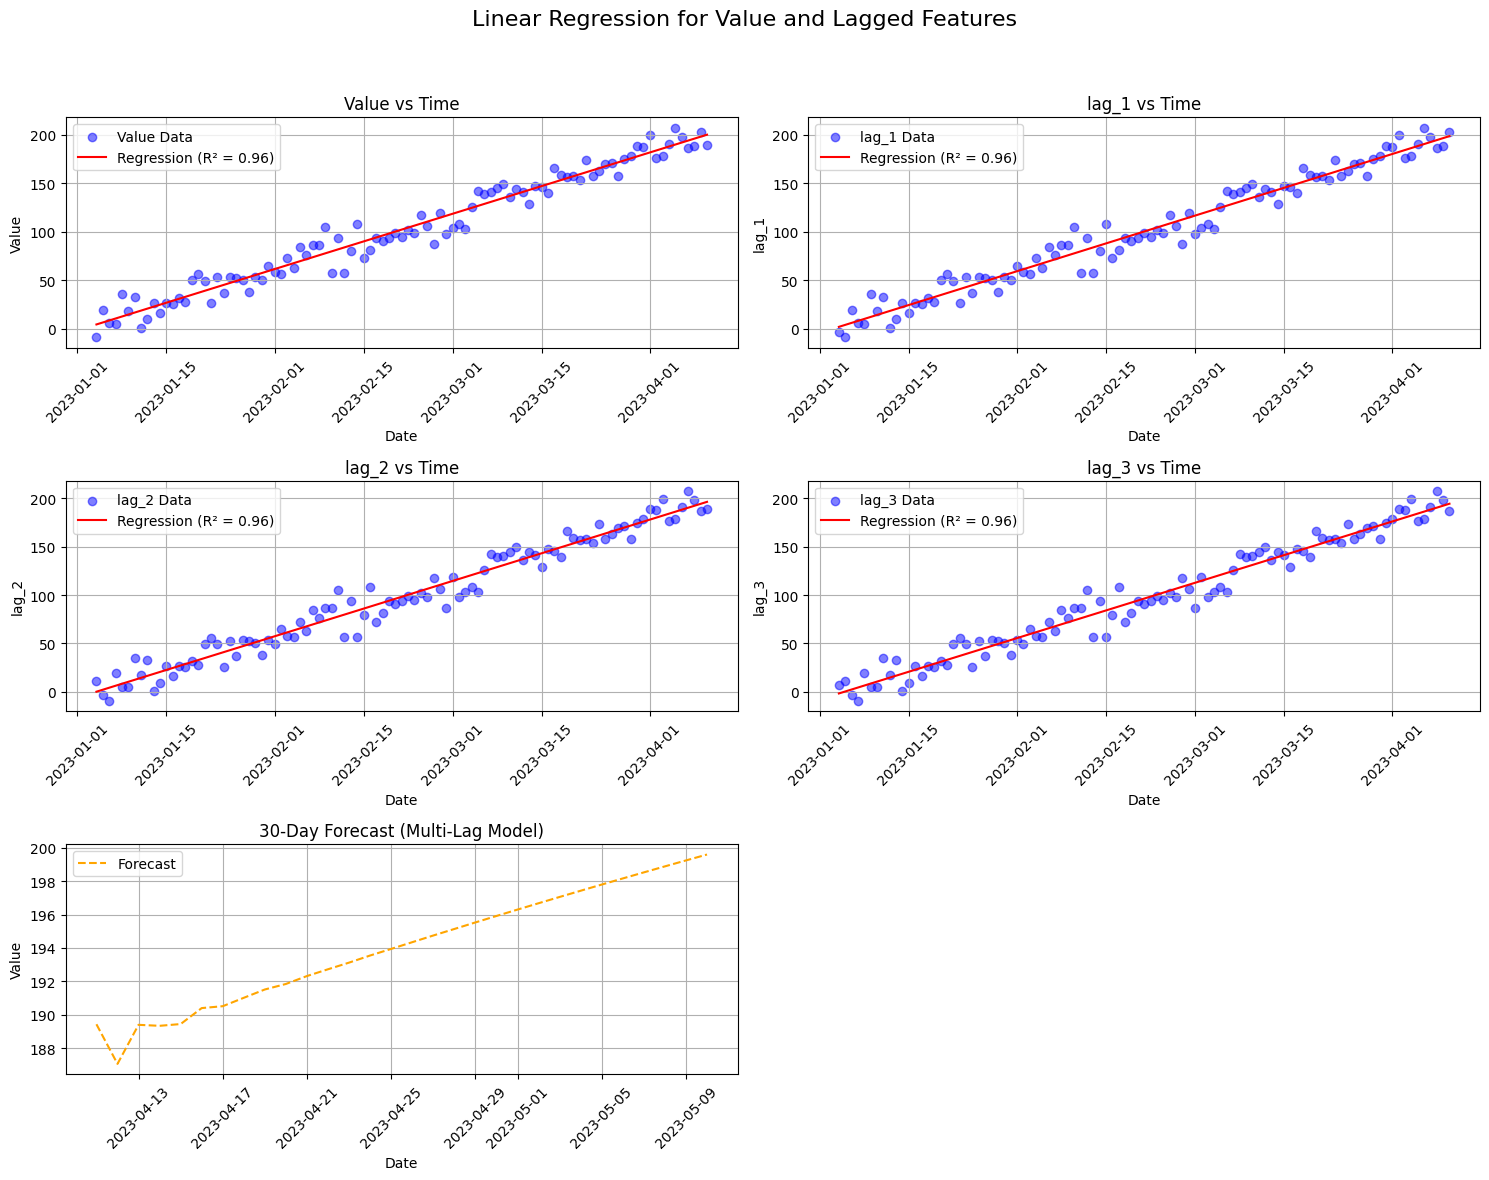

In [6]:

# Step 4: Multi-lag model for forecasting
X = lagged_data.drop('Value', axis=1)  # Features: lag_1, lag_2, lag_3
y = lagged_data['Value']  # Target: current Value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

multi_lag_model = LinearRegression()
multi_lag_model.fit(X_train, y_train)
y_pred_train = multi_lag_model.predict(X_train)
y_pred_test = multi_lag_model.predict(X_test)

# Evaluate the multi-lag model
train_r2 = multi_lag_model.score(X_train, y_train)
test_r2 = multi_lag_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Multi-Lag Model Training R² Score: {train_r2:.2f}")
print(f"Multi-Lag Model Testing R² Score: {test_r2:.2f}")
print(f"Multi-Lag Model Mean Squared Error (MSE): {mse:.2f}")

# Step 5: Forecast future values (next 30 days) with multi-lag model
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions = []
last_values = data['Value'][-lag:].values.tolist()

for _ in range(len(future_dates)):
    input_lags = np.array(last_values[-lag:]).reshape(1, -1)
    next_pred = multi_lag_model.predict(input_lags)[0]
    future_predictions.append(next_pred)
    last_values.append(next_pred)

# Step 6: Visualize everything in subplots (3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Linear Regression for Value and Lagged Features', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot individual regressions for Value and each lag
for i, (name, series) in enumerate(variables.items()):
    model = LinearRegression()
    model.fit(time_index, series)
    y_pred = model.predict(time_index)
    r2 = model.score(time_index, series)

    ax = axes[i]
    ax.scatter(lagged_data.index, series, color='blue', alpha=0.5, label=f'{name} Data')
    ax.plot(lagged_data.index, y_pred, color='red', label=f'Regression (R² = {r2:.2f})')
    ax.set_title(f'{name} vs Time')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{name}')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# Plot forecast in the fifth subplot
axes[4].plot(future_dates, future_predictions, color='orange', linestyle='--', label='Forecast')
axes[4].set_title('30-Day Forecast (Multi-Lag Model)')
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Value')
axes[4].legend()
axes[4].grid(True)
axes[4].tick_params(axis='x', rotation=45)

# Hide the unused sixth subplot
axes[5].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()